# Draw CSKG plots

In [1]:
filename='stats/cskgconnected_all.tsv'

In [2]:
indegrees=[]
outdegrees=[]
prs=[]
with open(filename, 'r') as f:
    header=next(f)
    for line in f:
        data=line.strip().split('\t')
        prop=data[1]
        val=data[2]
        if prop=='vertex_in_degree':
            indegrees.append(int(val))
        elif prop=='vertex_out_degree':
            outdegrees.append(int(val))
        elif prop=='vertex_pagerank':
            prs.append(float(val))

In [20]:
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import random

In [21]:
def plot_freq_dist(cnt, title=None, x_axis='Entity mentions', loglog=False, b=2, save=False):
	"""
	Plot a frequency distribution from a dictionary where keys are strings, and values are their frequencies.
	"""
	fig = plt.figure()

	y = OrderedDict(cnt.most_common())
	v=list(y.values())
	k=np.arange(0,len(v),1)
	if loglog:
		plt.loglog(k,v, basex=b)
	else:
		plt.plot(k,v)
	plt.ylabel('Frequency')
	plt.xlabel(x_axis)
	if title:
		if loglog:
			p_title = 'Distribution of %s (log-log)' % title
		else:
			p_title = 'Distribution of %s' % title
		plt.title(p_title)
	plt.show()
	if save:
		if title:		
			fig.savefig('img/%s.png' % p_title.lower().replace(' ', '_'), bbox_inches='tight')
		else:
			fig.savefig('img/%d.png' % random.randint(0,1000000), bbox_inches='tight')	

In [22]:
max(indegrees)

11081

/Users/filipilievski/opt/anaconda3/envs/mowgli-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


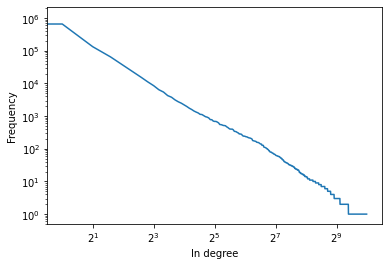

In [24]:
plot_freq_dist(Counter(indegrees), x_axis='In degree', loglog=True, save=True)

In [25]:
max(outdegrees)

6366

/Users/filipilievski/opt/anaconda3/envs/mowgli-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


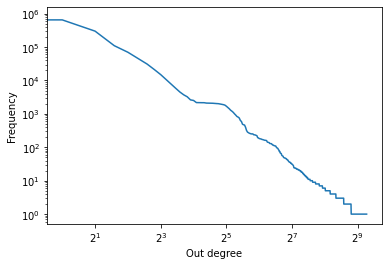

In [26]:
plot_freq_dist(Counter(outdegrees), x_axis='Out degree', loglog=True, save=True)

/Users/filipilievski/opt/anaconda3/envs/mowgli-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


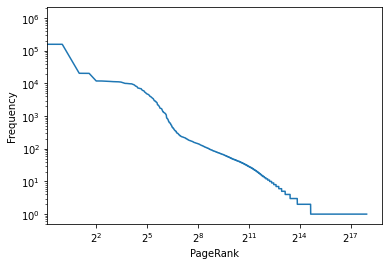

In [29]:
plot_freq_dist(Counter(prs), x_axis='PageRank', loglog=True, save=True)

In [30]:
prs[:10]

[1.3009962990972102e-07,
 2.4068429674190083e-07,
 4.361583156541608e-06,
 0.0003547632254625828,
 1.3009962990972102e-07,
 6.990002010625451e-07,
 5.9884473035812004e-06,
 2.675780712406884e-07,
 2.8443177264467897e-06,
 1.4337446916887028e-05]

In [31]:
max(prs)

0.001536276906051277